<a href="https://colab.research.google.com/github/PawarAarti007/AI-ML-project/blob/main/Attention_mechanism_model0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

!pip install torch

In [ ]:
from transformers import AutoTokenizer, AutoModel

# Load BERT (encoder-only Transformer)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

model = AutoModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
text = "The trophy didn't fit in the suitcase because it was too small."

inputs = tokenizer(text, return_tensors="pt")

In [ ]:
# Get outputs (last hidden states)

outputs = model(**inputs)

print("Tokenized input IDs:", inputs['input_ids'])

print("Output shape:", outputs.last_hidden_state.shape)

Tokenized input IDs: tensor([[  101,  1996,  5384,  2134,  1005,  1056,  4906,  1999,  1996, 15940,
          2138,  2009,  2001,  2205,  2235,  1012,   102]])
Output shape: torch.Size([1, 17, 768])


In [ ]:
model = AutoModel.from_pretrained("bert-base-uncased", output_attentions=True)

outputs = model(**inputs)

attentions = outputs.attentions  # List of matrices, one per layer

print(f"Total layers: {len(attentions)}")

print(f"Shape of one attention matrix: {attentions[-1].shape}")

# Shape: (batch, heads, tokens, tokens)

Total layers: 12
Shape of one attention matrix: torch.Size([1, 12, 17, 17])


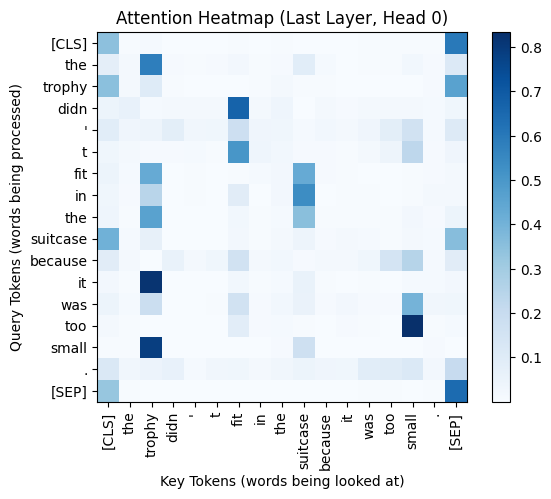

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Take last layer, batch 0, head 0

last_layer = attentions[3][0]  # shape [heads, tokens, tokens]

head0 = last_layer[10].detach().numpy()

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.imshow(head0, cmap='Blues')

plt.title("Attention Heatmap (Last Layer, Head 0)")

plt.xlabel("Key Tokens (words being looked at)")

plt.ylabel("Query Tokens (words being processed)")

plt.xticks(np.arange(len(tokens)), tokens, rotation=90)

plt.yticks(np.arange(len(tokens)), tokens)

plt.colorbar()

plt.show()